In [11]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the dataset
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,stratify=y_train,random_state=42)

In [21]:
# Determine the number of clusters using silhouette analysis
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train, labels))

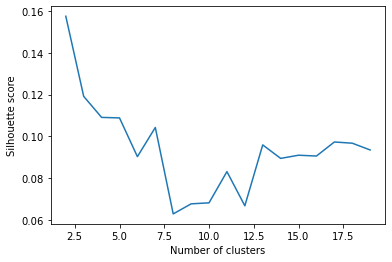

In [15]:
# Ploting the number of clusters
plt.plot(range(2,20),silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [16]:
n_clusters = np.argmax(silhouette_scores) + 2
# Fit the K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=2, random_state=42)

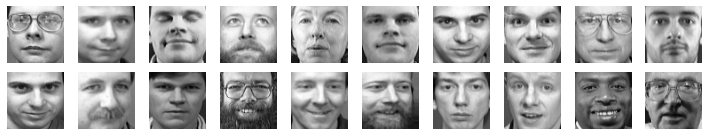

In [18]:
# Visualize the clusters
fig, axes = plt.subplots(nrows=n_clusters, ncols=10, figsize=(10, n_clusters))
for i in range(n_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    sample_indices = np.random.choice(cluster_indices, size=10, replace=False)
    for j, idx in enumerate(sample_indices):
        axes[i, j].imshow(X_train[idx].reshape(64, 64), cmap=plt.cm.gray)
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

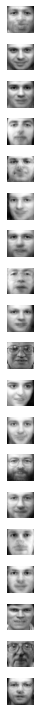

In [24]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
# Visualize the mean image of each cluster
fig, axes = plt.subplots(nrows=n_clusters, ncols=1, figsize=(10, 10))
for i in range(n_clusters):
    mean_image = cluster_centers[i].reshape(64, 64)
    axes[i].imshow(mean_image, cmap=plt.cm.gray)
    axes[i].axis('off')
plt.tight_layout()
plt.show()